# Import Statements

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Read File

In [2]:
front_foot_df = pd.read_csv('Dataset/front foot data set - front_foot_contact.csv')

In [3]:
front_foot_df

,timestamp,strideAngles,frontLegFlexAngle,frontFootRotation,frontAnkleRotationX,backAnkleRotationX,frontShinFootAngle,frontFootY,backFootY,frontFootZ,backFootZ,feetDistZ,landing_detected
0,309710,61.831375,75.698151,-24.993851,0.688424,0.048428,83.861679,1.534015,1.382597,-0.422767,0.401435,0.824202,0.0
1,309720,57.264088,83.765427,-23.783731,0.739471,0.066842,82.588753,1.574224,1.371410,-0.406835,0.404496,0.811331,0.0
2,309730,52.505524,91.896538,-18.457983,0.786926,0.112425,81.017624,1.613857,1.361067,-0.385190,0.412187,0.797377,0.0
3,309740,52.505516,96.914711,-8.354937,0.821722,0.140937,79.070160,1.649016,1.361707,-0.378896,0.416650,0.795546,0.0
4,309750,47.411980,99.941750,3.224091,0.851581,0.166368,81.951363,1.650420,1.350242,-0.358071,0.411261,0.769331,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18498,343910,7.700769,98.067459,51.062103,0.601809,0.657083,89.999985,1.501689,1.292416,-0.156866,-0.103246,0.053620,NaN
18499,343920,11.193379,93.666618,45.084656,0.533085,0.670252,89.999969,1.475496,1.342123,-0.150203,-0.105896,0.044308,NaN
18500,343930,13.944739,91.748367,41.914948,0.493032,0.670252,89.999985,1.461133,1.341637,-0.140871,-0.102933,0.037937,NaN
18501,343940,20.957596,88.867340,39.601410,0.446974,0.744239,89.999985,1.442174,1.372031,-0.102806,-0.099634,0.003171,NaN


# Exploratory Data Analysis

In [4]:
# Number of rows, Number of columns

num_of_rows, num_of_columns = front_foot_df.shape
print('Number of Rows: {}\nNumber of Colums: {}'.format(num_of_rows, num_of_columns))

Number of Rows: 18503
Number of Colums: 13


In [5]:
# Data info

front_foot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18503 entries, 0 to 18502
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            18503 non-null  int64  
 1   strideAngles         18503 non-null  float64
 2   frontLegFlexAngle    18503 non-null  float64
 3   frontFootRotation    18503 non-null  float64
 4   frontAnkleRotationX  18503 non-null  float64
 5   backAnkleRotationX   18503 non-null  float64
 6   frontShinFootAngle   18503 non-null  float64
 7   frontFootY           18503 non-null  float64
 8   backFootY            18503 non-null  float64
 9   frontFootZ           18503 non-null  float64
 10  backFootZ            18503 non-null  float64
 11  feetDistZ            18503 non-null  float64
 12  landing_detected     16099 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [6]:
front_foot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18503 entries, 0 to 18502
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            18503 non-null  int64  
 1   strideAngles         18503 non-null  float64
 2   frontLegFlexAngle    18503 non-null  float64
 3   frontFootRotation    18503 non-null  float64
 4   frontAnkleRotationX  18503 non-null  float64
 5   backAnkleRotationX   18503 non-null  float64
 6   frontShinFootAngle   18503 non-null  float64
 7   frontFootY           18503 non-null  float64
 8   backFootY            18503 non-null  float64
 9   frontFootZ           18503 non-null  float64
 10  backFootZ            18503 non-null  float64
 11  feetDistZ            18503 non-null  float64
 12  landing_detected     16099 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [7]:
# Column Name with Null count

front_foot_df.isnull().sum()

timestamp                 0
strideAngles              0
frontLegFlexAngle         0
frontFootRotation         0
frontAnkleRotationX       0
backAnkleRotationX        0
frontShinFootAngle        0
frontFootY                0
backFootY                 0
frontFootZ                0
backFootZ                 0
feetDistZ                 0
landing_detected       2404
dtype: int64

In [8]:
# Data Statistics

front_foot_df.describe()

,timestamp,strideAngles,frontLegFlexAngle,frontFootRotation,frontAnkleRotationX,backAnkleRotationX,frontShinFootAngle,frontFootY,backFootY,frontFootZ,backFootZ,feetDistZ,landing_detected
count,1.850300e+04,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,18503.000000,16099.000000
mean,4.836815e+05,40.606064,40.346962,-0.343426,0.189082,0.262677,96.311149,1.395007,1.334794,-0.023753,0.031583,0.515576,0.282813
std,4.949674e+05,24.700903,37.027238,86.448120,0.359729,0.294849,18.132221,0.176263,0.103623,0.397259,0.269794,0.319333,0.450380
min,6.242000e+04,0.000000,-43.044369,-179.993729,-0.892772,-0.625690,16.034866,1.173465,1.182261,-0.816973,-0.619317,0.000023,0.000000
25%,2.127250e+05,18.872562,12.367503,-26.523445,-0.029487,0.064146,86.095791,1.253915,1.259328,-0.338234,-0.172274,0.241781,0.000000
50%,2.791300e+05,39.340694,30.293013,14.588409,0.165983,0.217970,92.785774,1.351334,1.317723,-0.070322,0.056286,0.484398,0.000000
75%,5.099450e+05,59.460817,65.922981,48.088028,0.495007,0.503341,107.570957,1.498343,1.393919,0.267988,0.250658,0.771649,1.000000
max,2.804560e+06,117.911263,167.531387,179.840622,0.897053,0.893851,168.084351,2.107711,1.969479,0.871541,0.603690,1.341446,1.000000


In [9]:
# Value counts of landing_detected

front_foot_df.groupby(['landing_detected'], dropna=False, as_index=False).size()

,landing_detected,size
0,0.0,11546
1,1.0,4553
2,NaN,2404


# Data Visualization

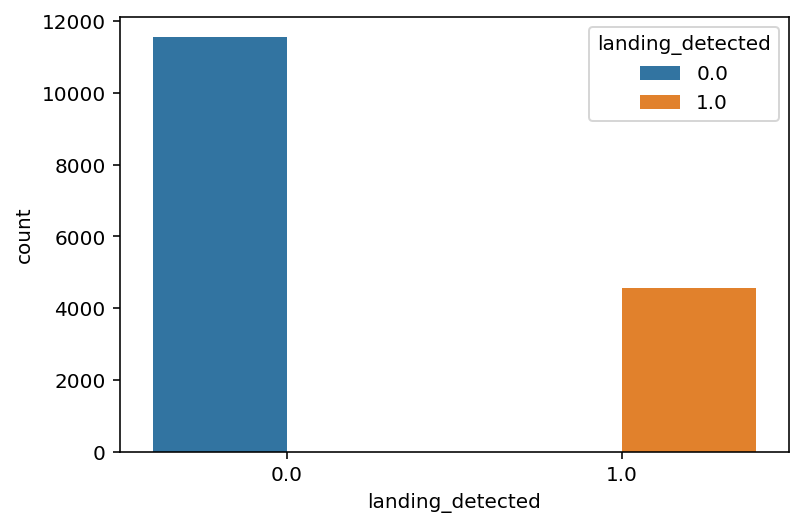

In [10]:
sns.countplot(x='landing_detected', hue='landing_detected', data=front_foot_df);

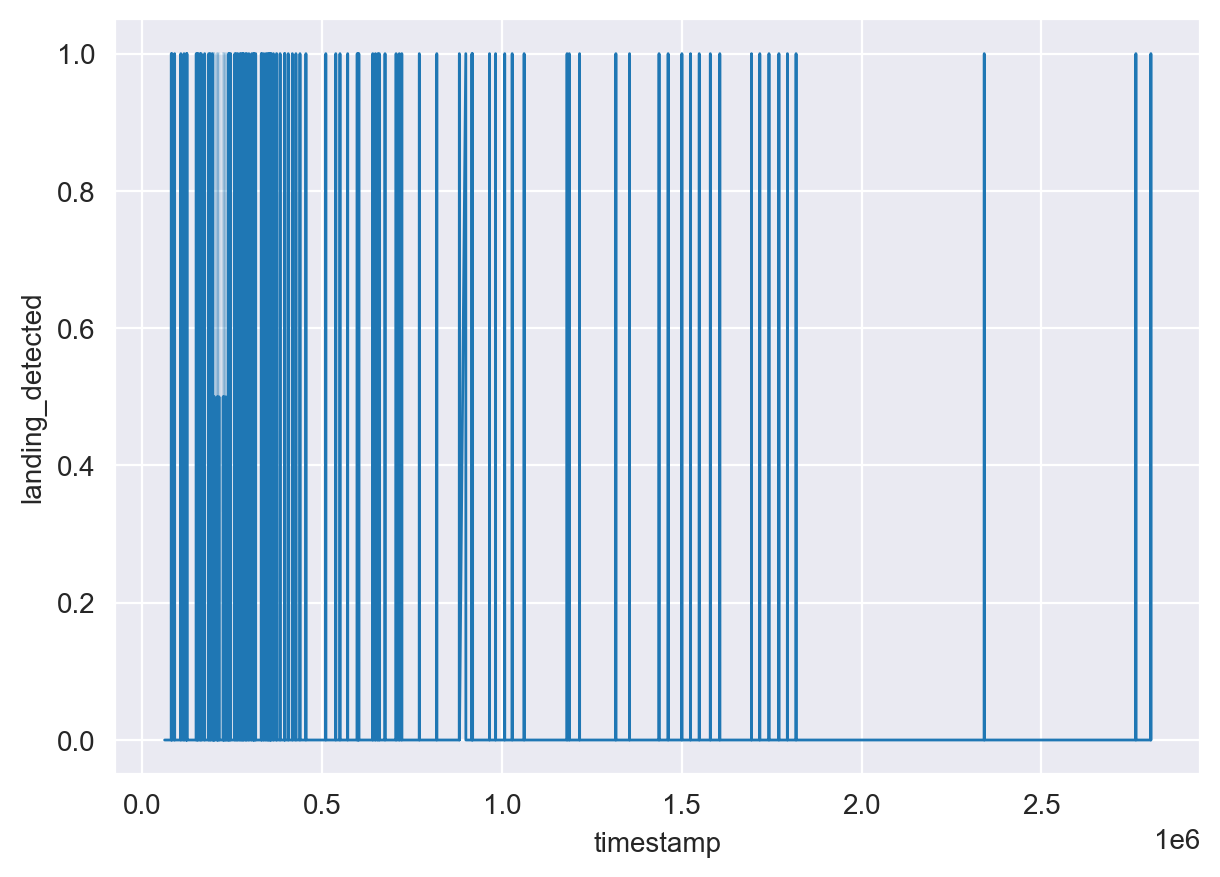

In [14]:
sns.set_style('darkgrid')

sns.lineplot(data=front_foot_df, x ='timestamp', y = 'landing_detected', palette='viridis', legend='full', lw=1)

plt.ylabel('landing_detected')
plt.xlabel('timestamp')
plt.show()

In [15]:
feature_columns = ['strideAngles', 'frontLegFlexAngle', 'frontFootRotation', 'frontAnkleRotationX', 'backAnkleRotationX', 'frontShinFootAngle', 'frontFootY', 'backFootY', 'frontFootZ', 'backFootZ', 'feetDistZ']

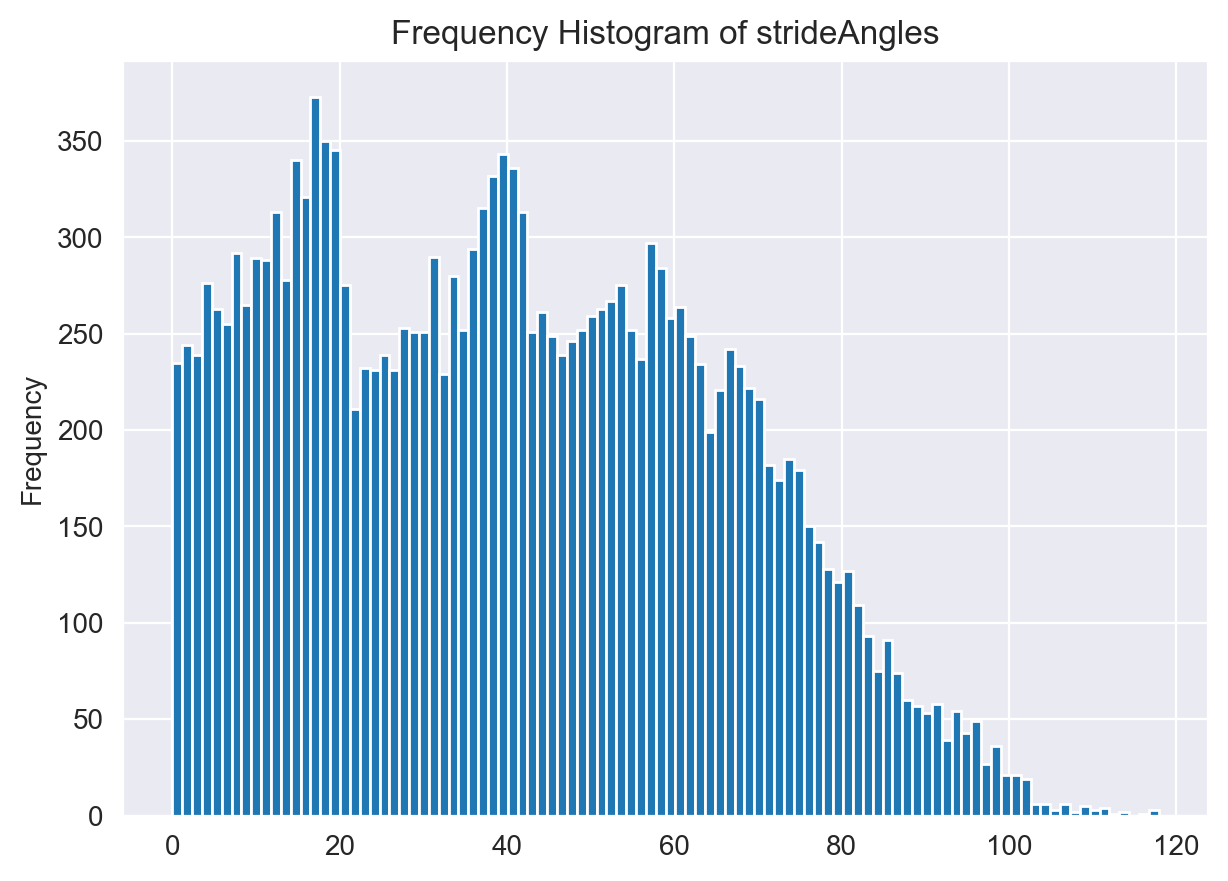

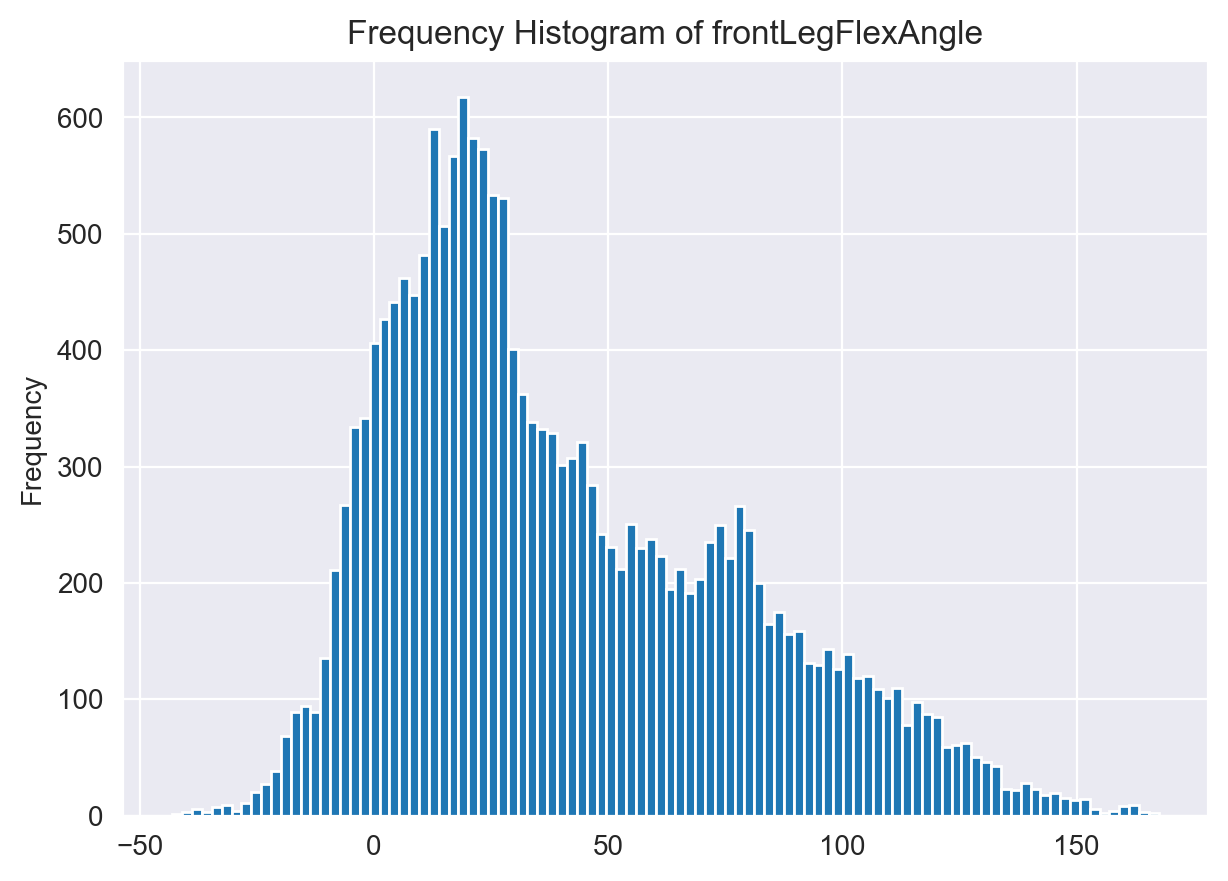

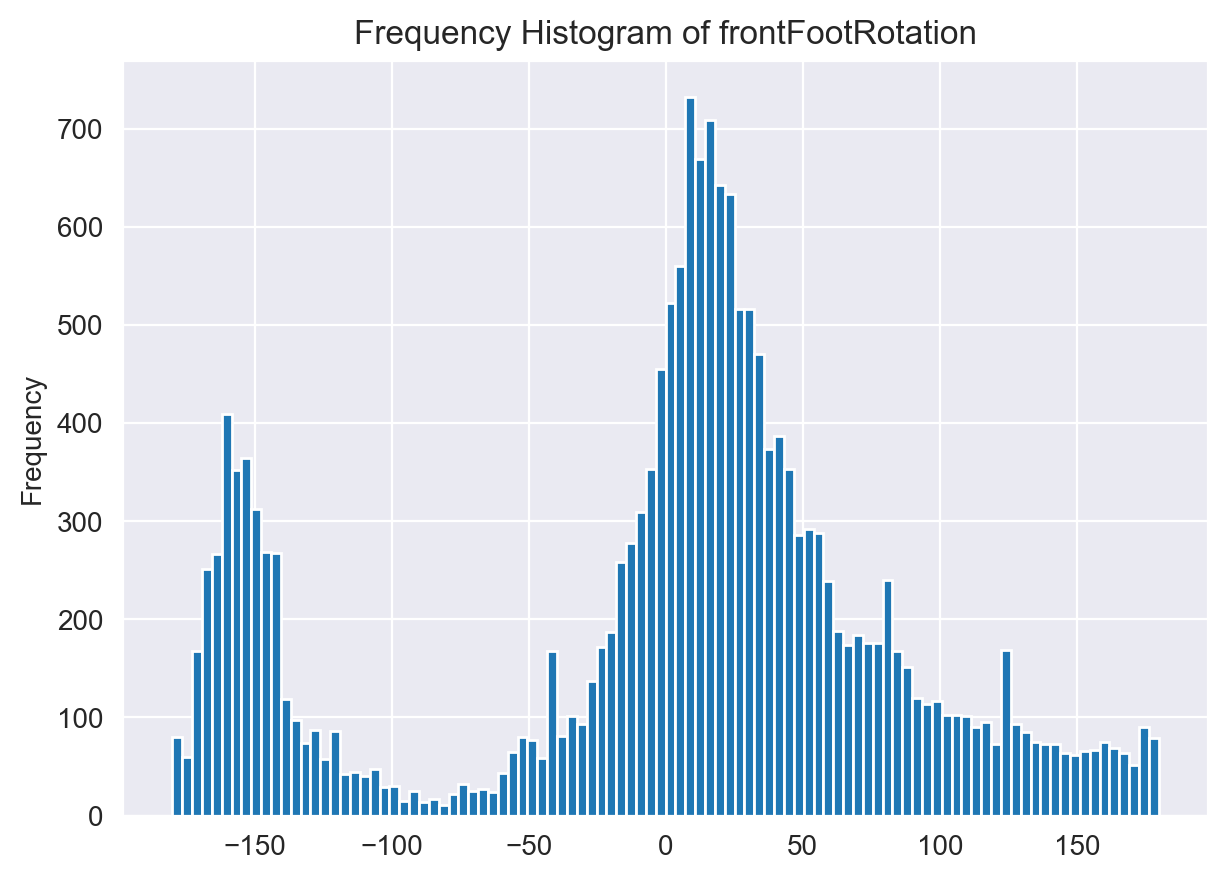

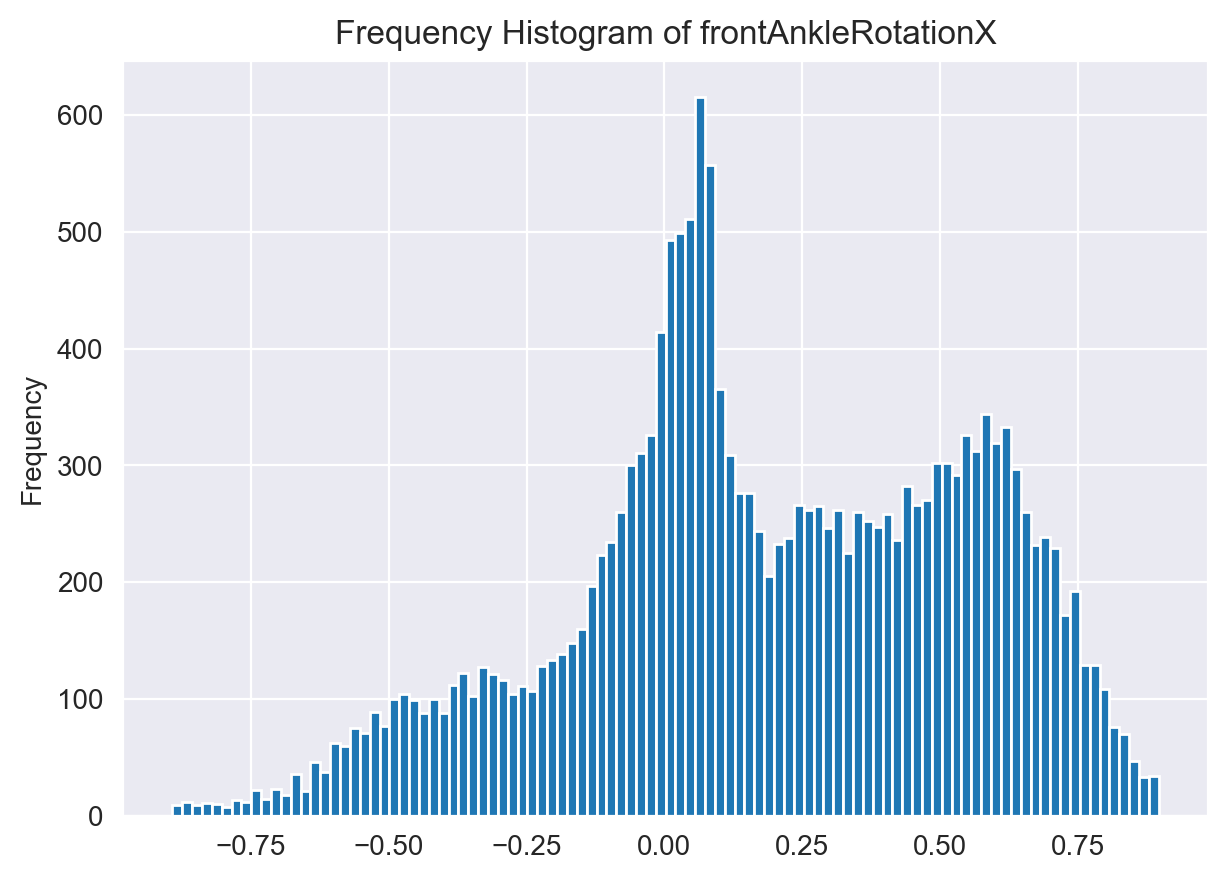

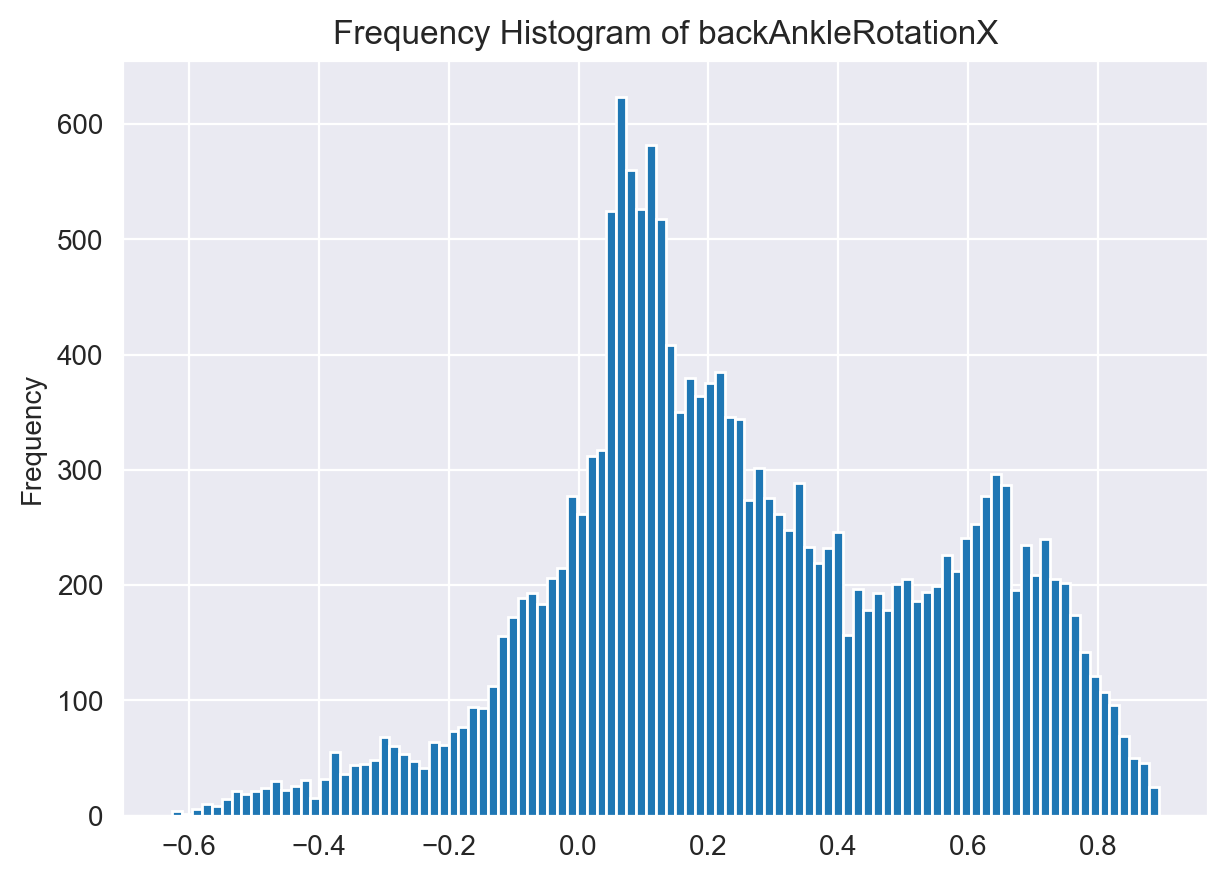

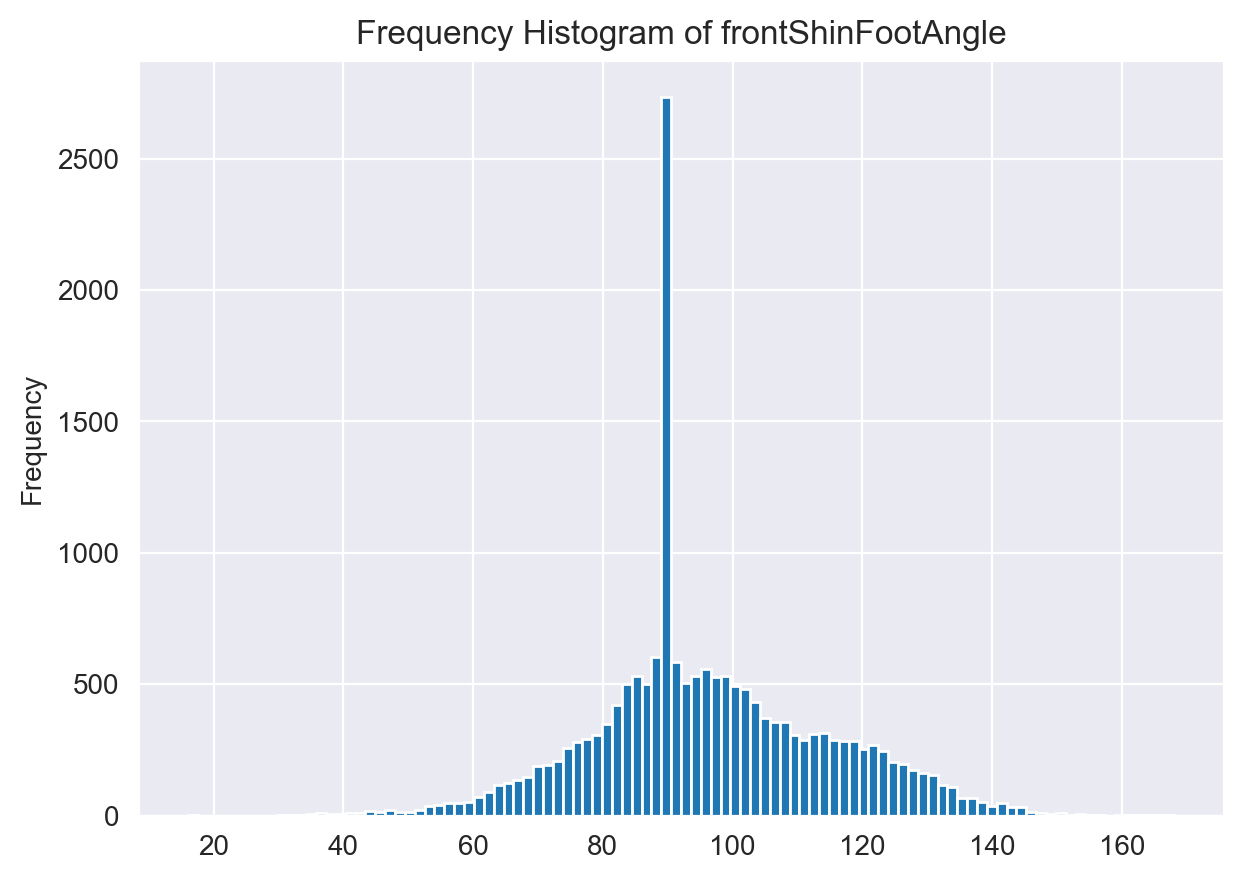

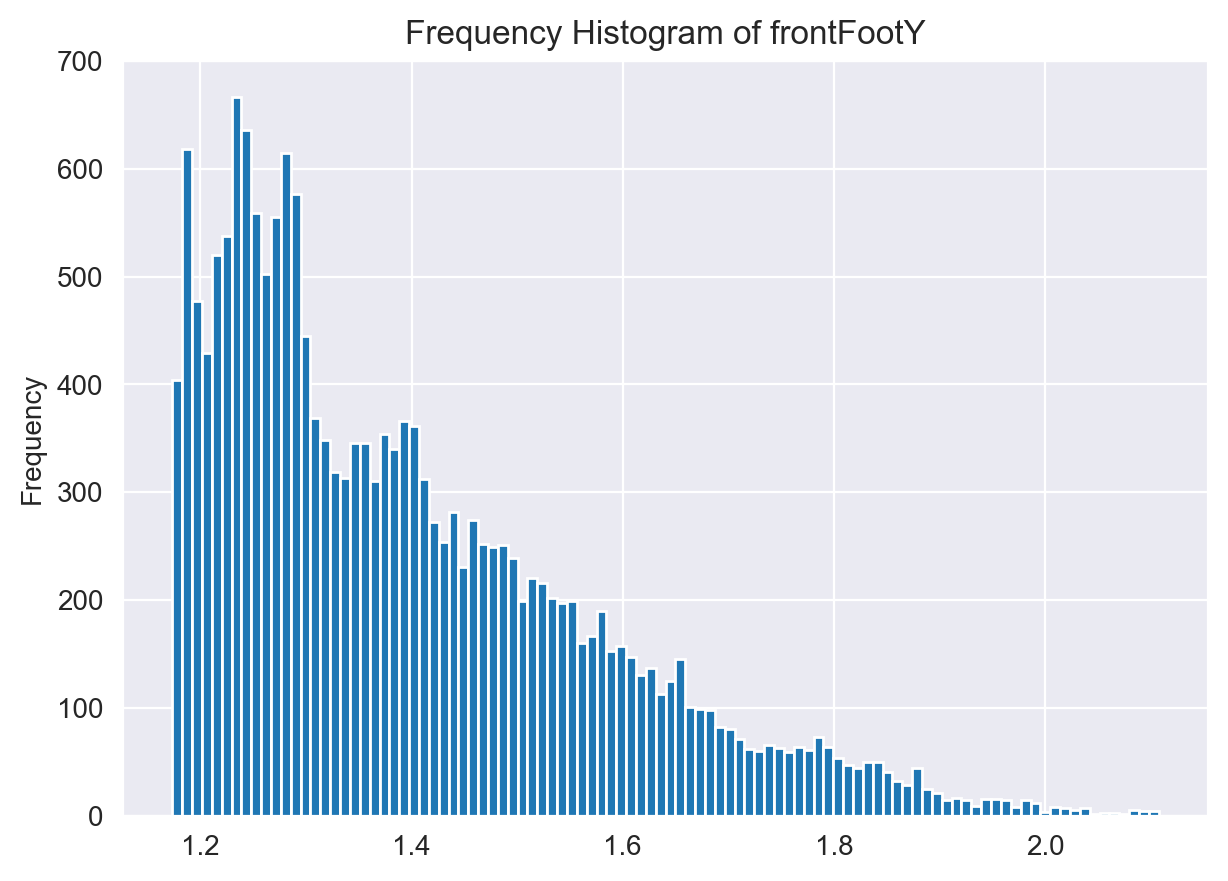

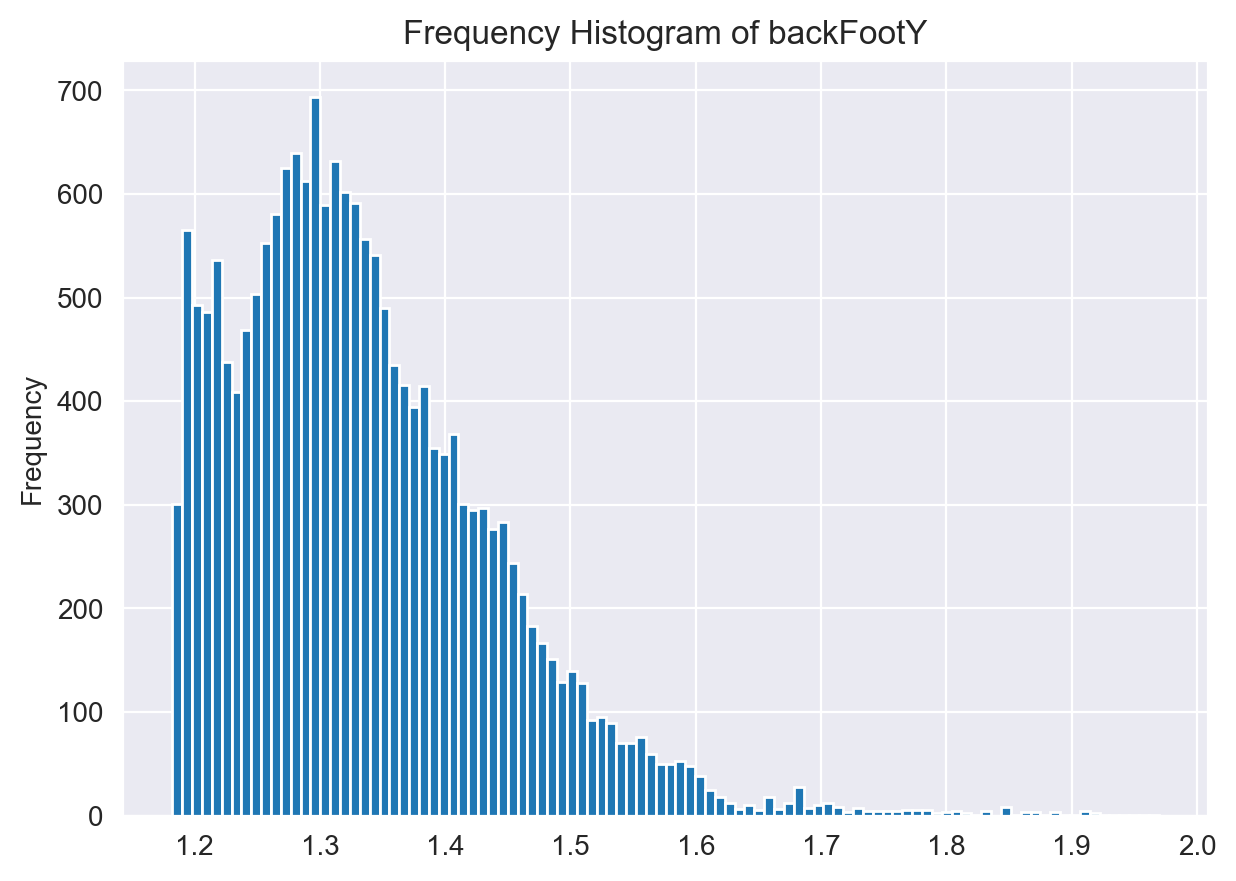

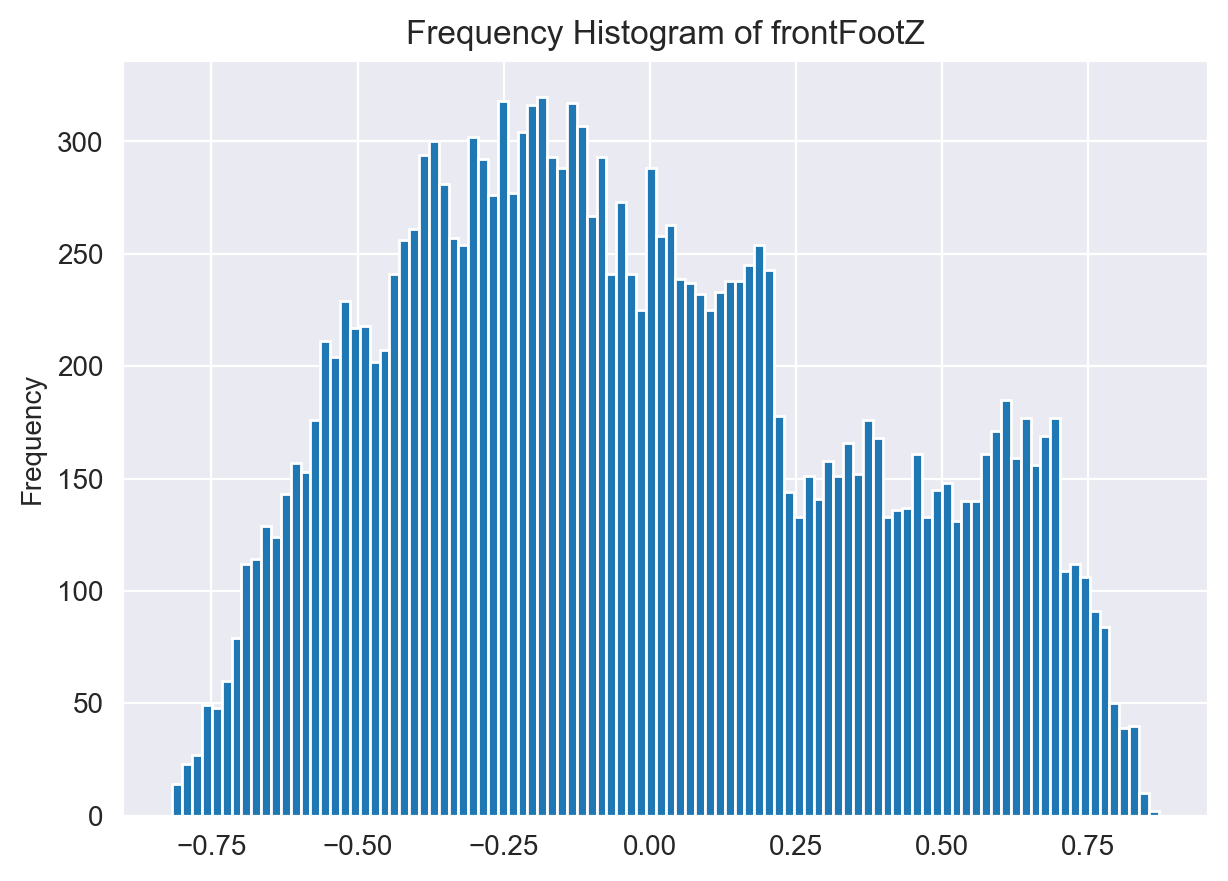

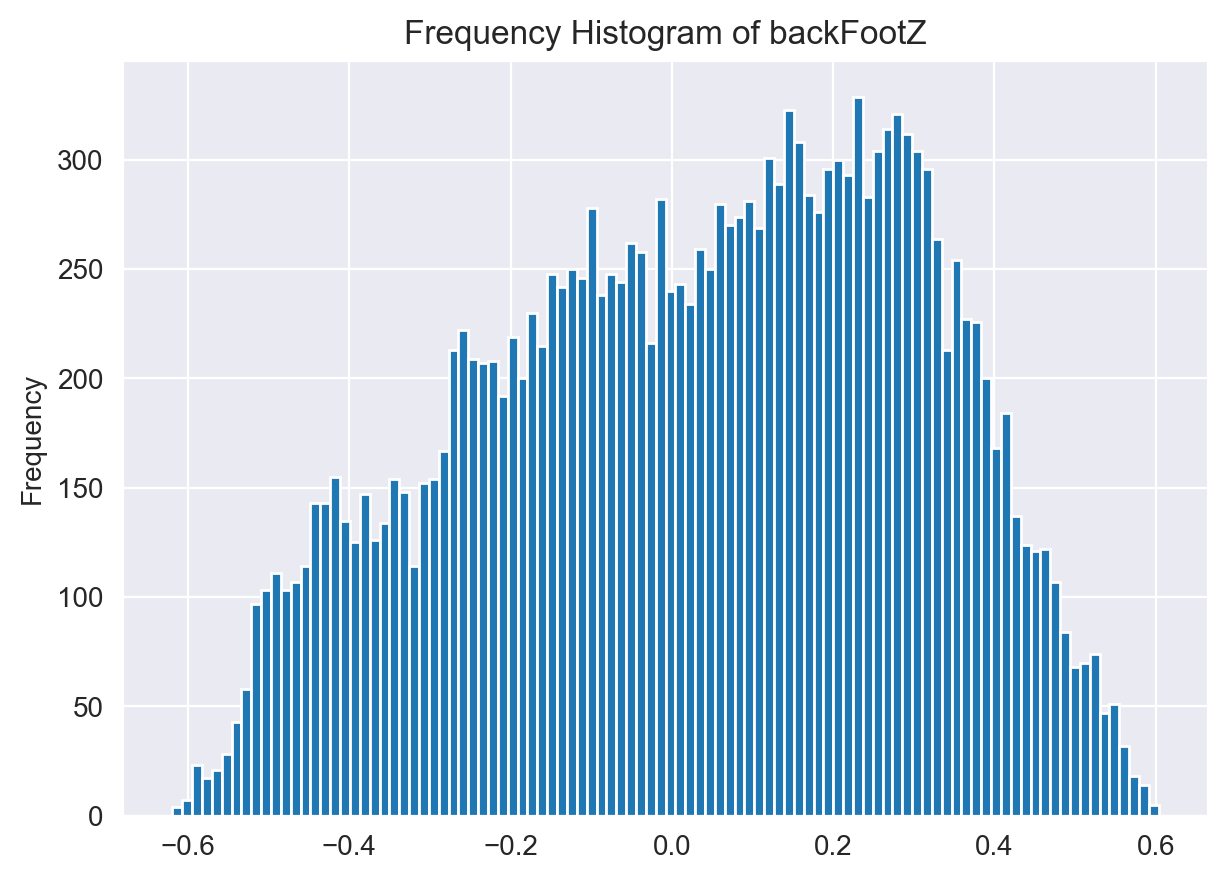

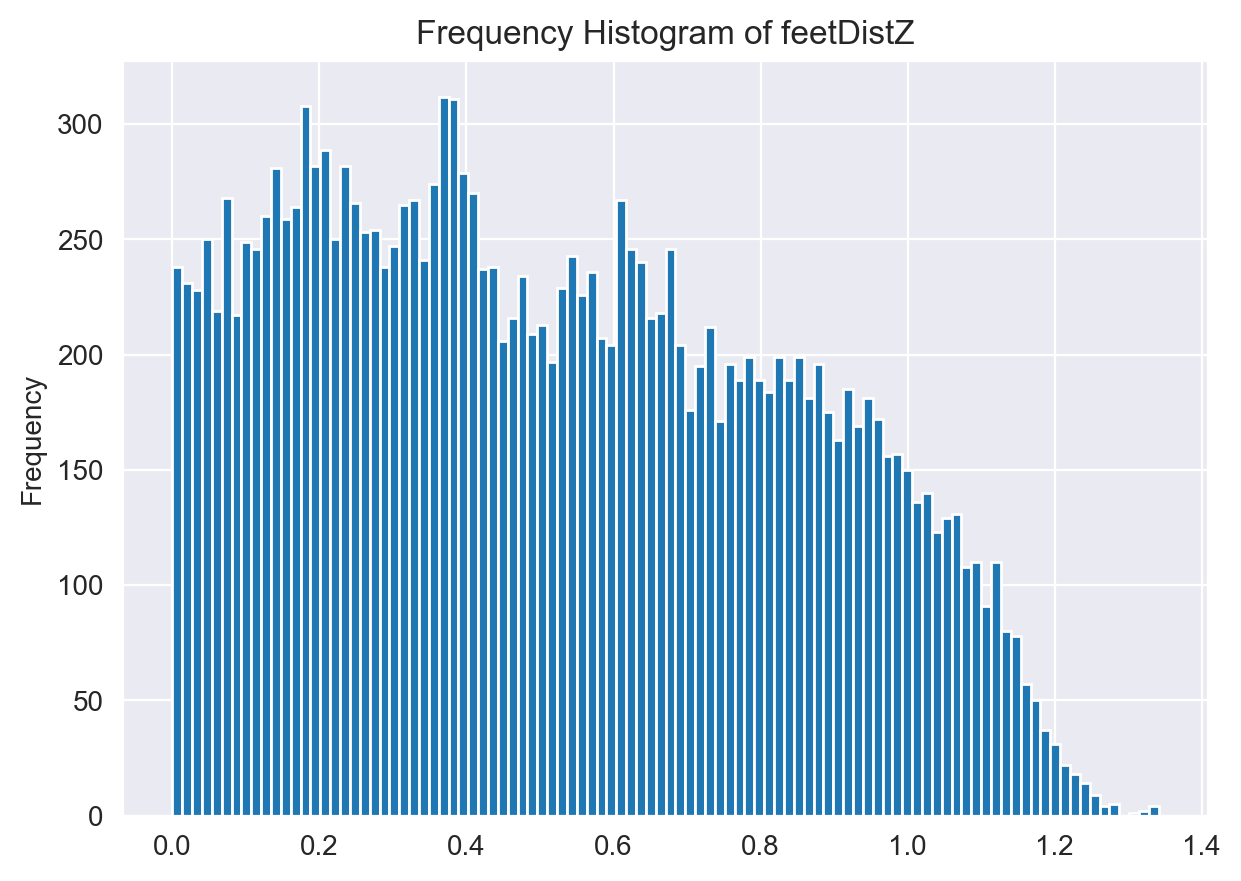

In [16]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

for col in feature_columns:
    plt.hist(front_foot_df[col], bins=100)
    plt.gca().set(title='Frequency Histogram of '+col, ylabel='Frequency');
    plt.show()